In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

E:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
stock_data = pd.read_csv("data_stocks.csv")
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
stock_data.shape

(41266, 502)

In [5]:
stock_data['logAAPL']= np.log(stock_data['NASDAQ.AAPL'])
stock_data['diflogAAPL'] = stock_data['logAAPL'] - stock_data['logAAPL'].shift(periods=-1)
stock_data = stock_data.fillna(0)

In [6]:
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logAAPL,diflogAAPL
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835


In [7]:
stock_data.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logAAPL,diflogAAPL
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250,5.100537,-0.000061
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100,5.100598,0.000670
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850,5.099927,0.000793
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301,5.099134,-0.000610
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800,5.099744,0.000000


In [8]:
stock_data.shape

(41266, 504)

In [9]:
dataAAPL = stock_data[['DATE','NASDAQ.AAPL','logAAPL','diflogAAPL']]
dataAAPL.rename(index=str, columns={"NASDAQ.AAPL": "AAPL"} , inplace=True)
dataAAPL.index= stock_data.index
dataAAPL.head()

E:\anaconda\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,DATE,AAPL,logAAPL,diflogAAPL
0,1491226200,143.6800,4.967589,-0.000139
1,1491226260,143.7000,4.967728,0.000069
2,1491226320,143.6901,4.967659,0.000349
3,1491226380,143.6400,4.967310,-0.000139
4,1491226440,143.6600,4.967449,-0.000835


In [10]:
dataAAPL.shape

(41266, 4)

In [11]:
dataAAPL.isnull().any()

DATE          False
AAPL          False
logAAPL       False
diflogAAPL    False
dtype: bool

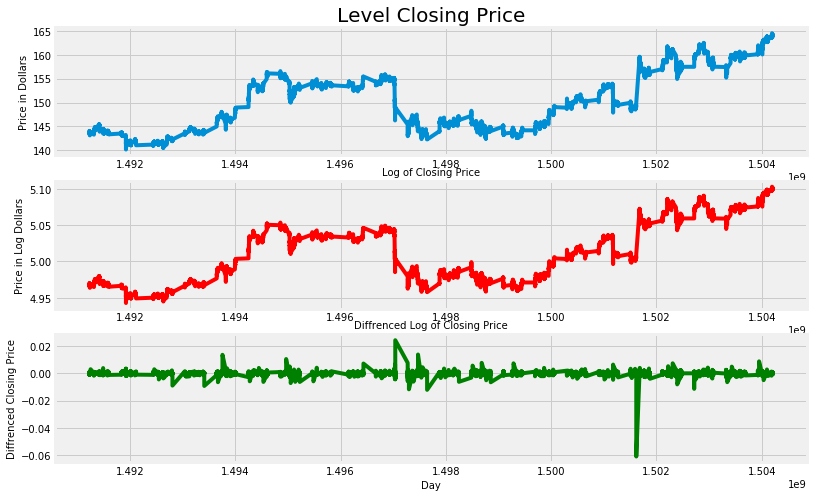

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(dataAAPL.DATE, dataAAPL.AAPL, label = "Log of AAPL Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(dataAAPL.DATE, dataAAPL.logAAPL, label = 'Log of AAPL', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(dataAAPL.DATE, dataAAPL.diflogAAPL, label = '1st Diffrence of Log of AAPL', color = 'g')
plt.title("Diffrenced Log of Closing Price", size = 10,)
plt.ylabel("Diffrenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

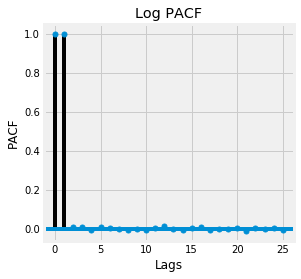

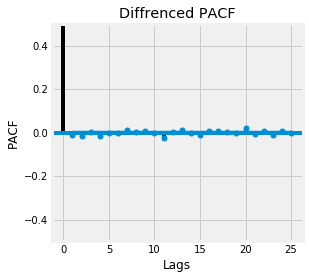

In [13]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(dataAAPL.logAAPL, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(dataAAPL.diflogAAPL, lags = 25, ax = ax)
ax.set_title('Diffrenced PACF')
ax.set_ylim(-.5, .5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


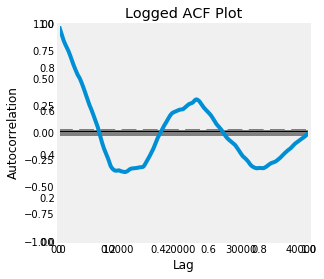

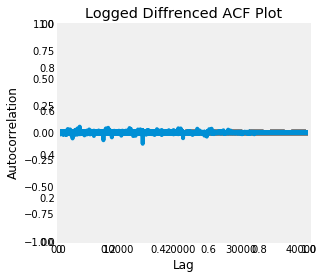

In [14]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(dataAAPL.logAAPL)
ax.set_title('Logged ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(dataAAPL.diflogAAPL)
ax.set_title('Logged Diffrenced ACF Plot')

In [15]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
print(dataAAPL.info())
dftest = adfuller(dataAAPL.diflogAAPL, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 4 columns):
DATE          41266 non-null int64
AAPL          41266 non-null float64
logAAPL       41266 non-null float64
diflogAAPL    41266 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.3 MB
None
Test Statistic                   -35.706500
p-value                            0.000000
# Lags Used                       30.000000
Number of Observations Used    41235.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [17]:
ararray = (dataAAPL.logAAPL.as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

(0, 1, 0) -492712.8852838061


E:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
E:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -492714.5491834332
(0, 1, 2) -492725.7039907831


E:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 0) -492714.4241138643


E:\anaconda\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\anaconda\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 1) -492714.93875463645
(1, 1, 2) -492726.4035785734
(2, 1, 0) -492725.43926753814
(2, 1, 1) -492725.85024407005
Best Model is : (1, 1, 2)


In [18]:
ARIMIAmod

In [19]:
y=ARIMIAmod.predict()

E:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [20]:
y.shape

(41265,)

In [21]:
type(y)

numpy.ndarray

In [22]:
y_series = pd.Series(y)

In [23]:
dataAAPL["y_predicted"] = y_series

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
dataAAPL.head()

,DATE,AAPL,logAAPL,diflogAAPL,y_predicted
0,1491226200,143.6800,4.967589,-0.000139,0.000003
1,1491226260,143.7000,4.967728,0.000069,0.000002
2,1491226320,143.6901,4.967659,0.000349,0.000001
3,1491226380,143.6400,4.967310,-0.000139,0.000008
4,1491226440,143.6600,4.967449,-0.000835,0.000008


In [25]:
dataAAPL.shape

(41266, 5)

In [26]:
np.mean(np.square(np.array((dataAAPL['diflogAAPL'] - dataAAPL['y_predicted']))))

nan

In [27]:
numofsteps = 1
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

E:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([[5.09854194, 5.10096371]])

In [34]:
error = (dataAAPL['diflogAAPL'] - dataAAPL['y_predicted'])
dataAAPL['Error'] = error
dataAAPL['sqrError'] = np.square(error)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
dataAAPL.head()

,DATE,AAPL,logAAPL,diflogAAPL,y_predicted,Error,sqrError
0,1491226200,143.6800,4.967589,-0.000139,0.000003,-0.000142,2.027450e-08
1,1491226260,143.7000,4.967728,0.000069,0.000002,0.000067,4.483158e-09
2,1491226320,143.6901,4.967659,0.000349,0.000001,0.000347,1.206156e-07
3,1491226380,143.6400,4.967310,-0.000139,0.000008,-0.000148,2.181236e-08
4,1491226440,143.6600,4.967449,-0.000835,0.000008,-0.000843,7.100060e-07


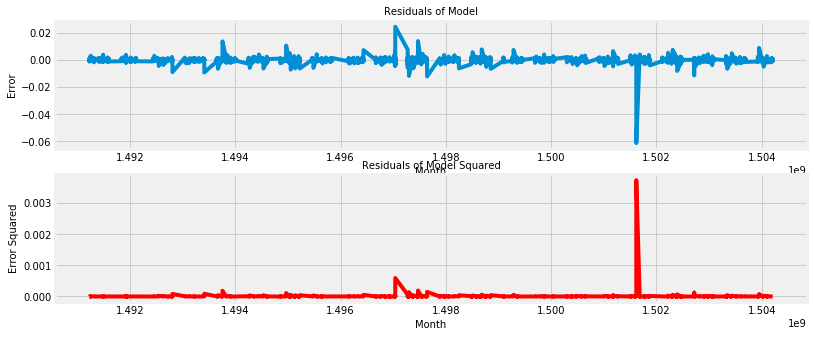

In [38]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(dataAAPL.DATE, dataAAPL.Error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(dataAAPL.DATE, dataAAPL.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)


E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


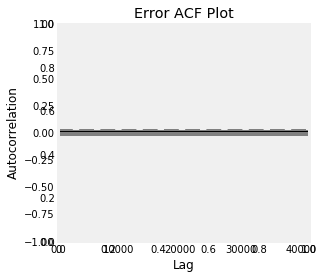

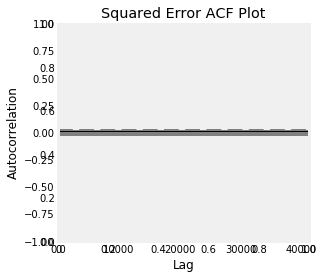

In [40]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(dataAAPL.Error)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(dataAAPL.sqrError)
ax.set_title('Squared Error ACF Plot')

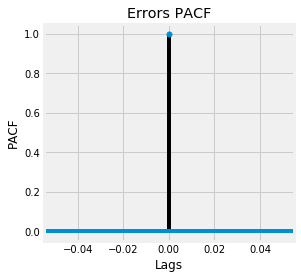

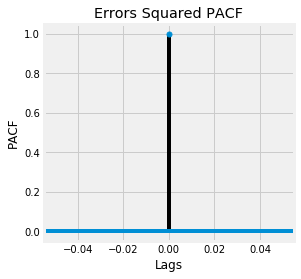

In [41]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(dataAAPL.Error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(dataAAPL.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')